In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline

In [37]:
df = pd.read_csv('Concrete_Data.csv')

In [38]:
df.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CA                1030 non-null   float64
 6   FA                1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CMS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [40]:
df.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

In [41]:
df.shape

(1030, 9)

In [42]:
df.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [43]:
#co - relation between the columns
df.corr()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot:>

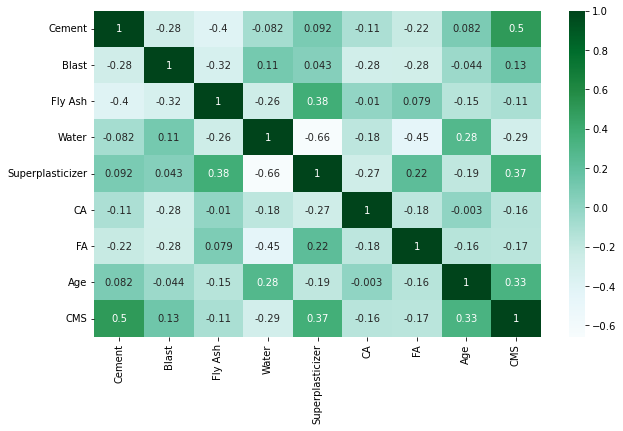

In [44]:
# visually showing the relation between columns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="BuGn")


In [45]:
# relation with target column
corr_format = df.corr()["CMS"]

In [46]:
corr_format

Cement              0.497832
Blast               0.134829
Fly Ash            -0.105755
Water              -0.289633
Superplasticizer    0.366079
CA                 -0.164935
FA                 -0.167241
Age                 0.328873
CMS                 1.000000
Name: CMS, dtype: float64

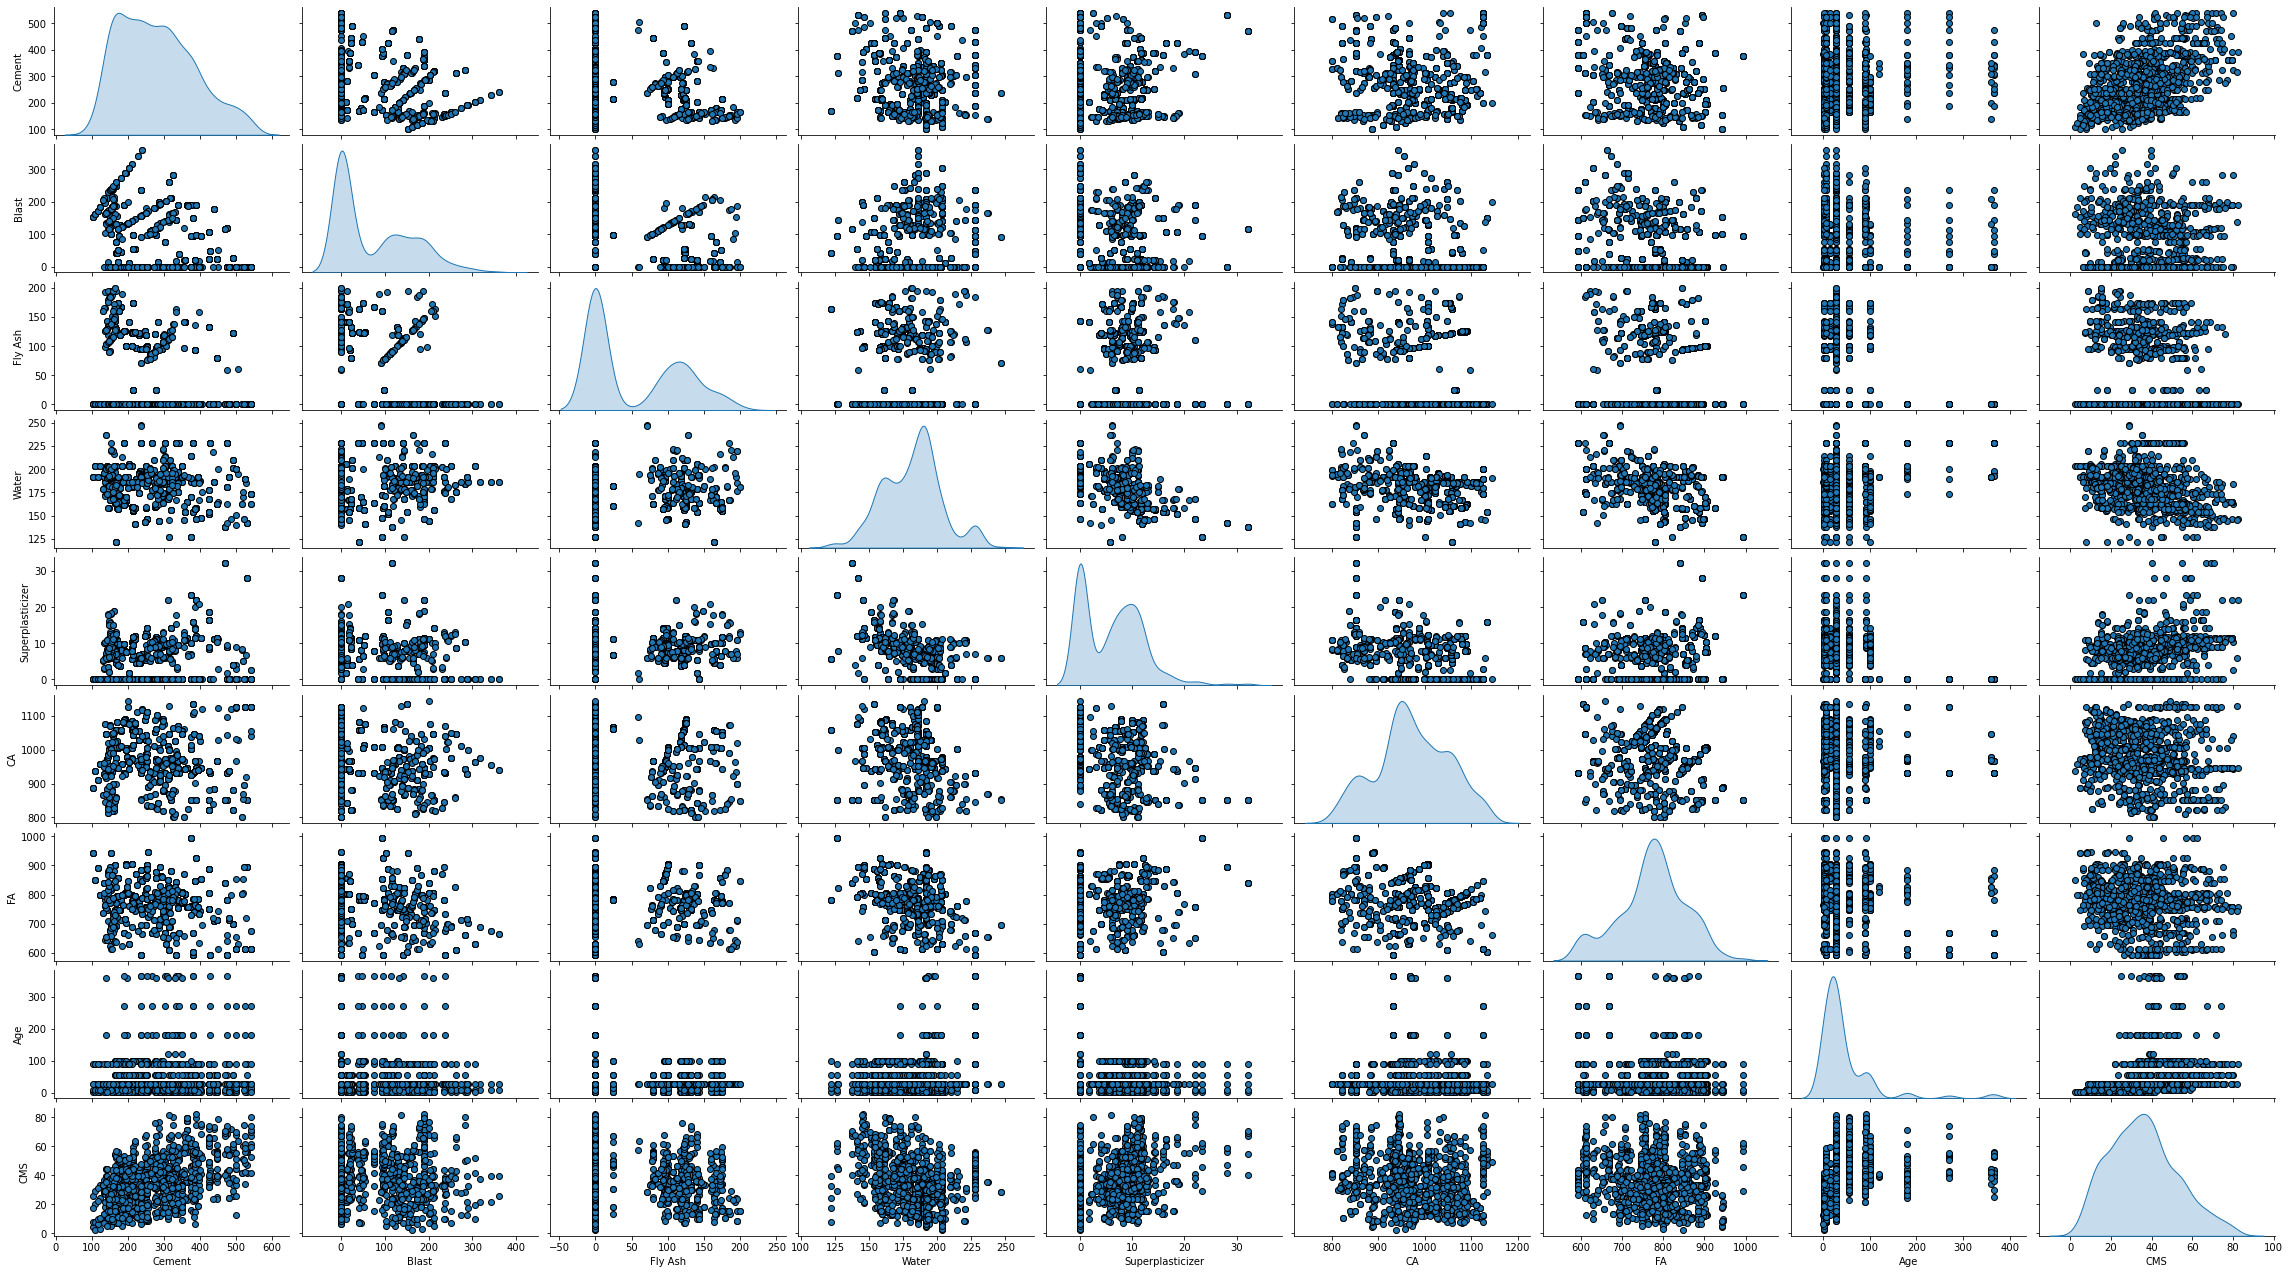

In [47]:
fig = sns.pairplot(df,height=2.0, aspect=1.8, 
                plot_kws={'edgecolor': 'k', 'linewidth': 1.0},
                diag_kind='kde', diag_kws={'shade': True})

# Distrubtion of datapoints in each column


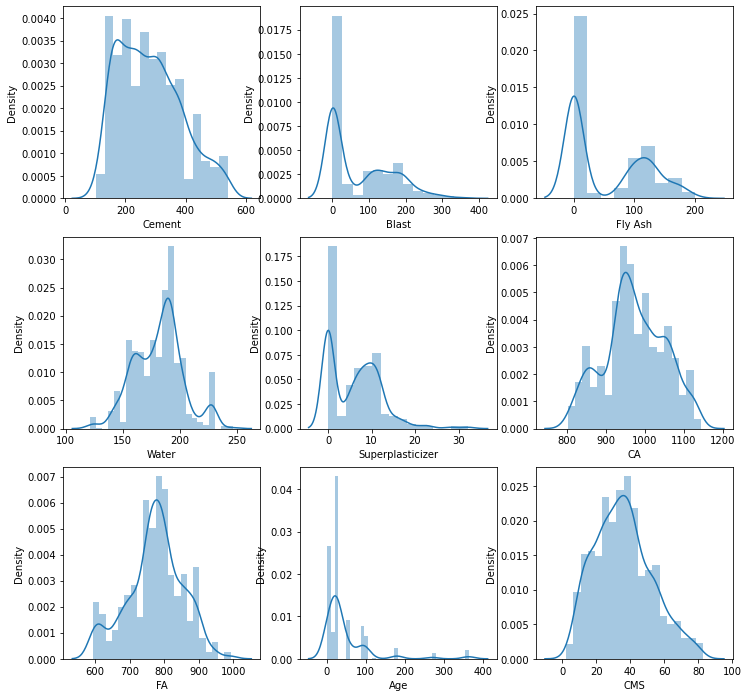

In [48]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in df.columns:
    plt.subplot(3,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

# Spliting into features and Target columns


In [51]:
x = df.drop('CMS', axis=1)
y = df['CMS']

In [52]:
x

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [53]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: CMS, Length: 1030, dtype: float64

# converting each column values into logs values because respond to skewness towards large values


In [54]:
for column in x.columns:
    x[column]+=1
    x[column]= np.log(x[column])

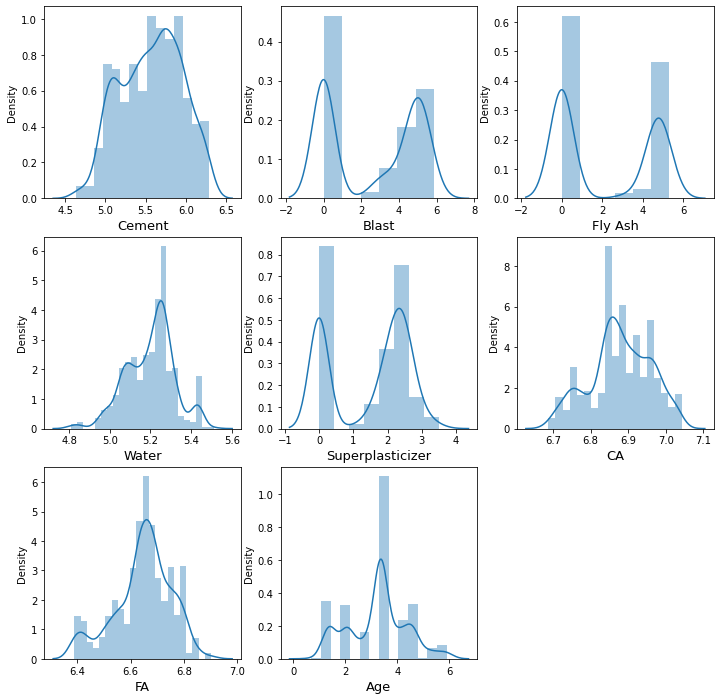

In [55]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber = 1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.distplot(x[column])
    plt.xlabel(column, fontsize=13)
    plotnumber+=1
plt.show()


# checking outliers

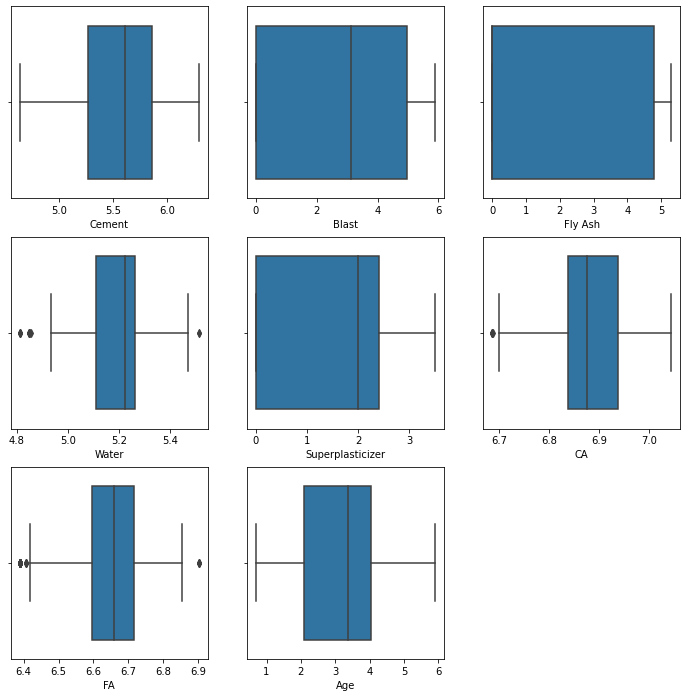

In [56]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.boxplot(x[column])
    plt.xlabel(column)
    plotnumber+=1
plt.show()

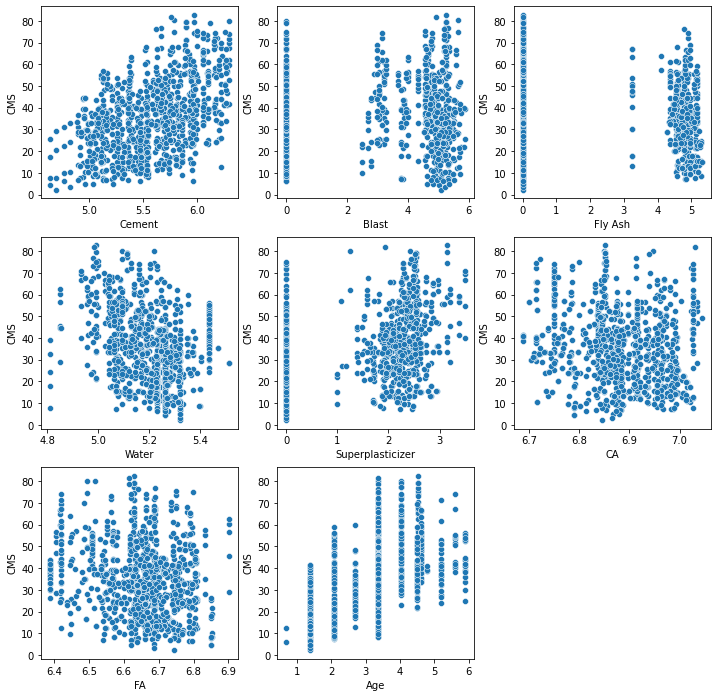

In [57]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.scatterplot(x[column],y)
    plt.xlabel(column)
    plotnumber+=1
plt.show()


<AxesSubplot:>

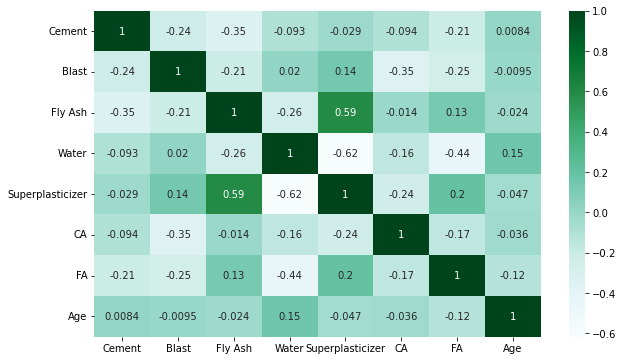

In [58]:
plt.figure(figsize=(10,6),facecolor='white')
sns.heatmap(x.corr(), annot=True,cmap="BuGn")

In [59]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [60]:
x_train

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
196,5.276583,0.000000,4.620059,5.115596,2.140066,6.915128,6.810032,3.367296
631,5.786897,0.000000,0.000000,5.220356,0.000000,6.969791,6.664409,2.079442
81,5.767696,5.363637,0.000000,5.054333,2.727853,6.748877,6.781512,1.386294
526,5.886104,2.995732,4.955827,5.043425,2.476538,6.849066,6.687109,1.386294
830,5.093750,5.252273,5.003946,5.192957,2.995732,6.732211,6.609349,3.367296
...,...,...,...,...,...,...,...,...
87,5.660527,5.307773,0.000000,4.981550,2.501436,6.913340,6.690470,1.386294
330,5.512622,0.000000,4.837075,4.971894,2.564949,6.991913,6.686984,2.708050
466,5.253843,0.000000,4.837868,5.121580,2.388763,6.984716,6.684487,4.615121
121,6.165418,4.785824,0.000000,5.204556,2.292535,6.748877,6.662494,3.367296


In [61]:
x_test

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
31,5.587249,4.744932,0.000000,5.433722,0.000000,6.838405,6.508769,5.902633
109,5.896054,5.247024,0.000000,5.111385,2.533697,6.851925,6.629099,2.079442
136,5.968452,5.247024,0.000000,4.989752,3.135494,6.851925,6.629099,3.367296
88,5.896054,5.247024,0.000000,5.111385,2.533697,6.851925,6.629099,1.386294
918,4.983607,0.000000,5.192957,5.313206,2.197225,6.715383,6.768493,3.367296
...,...,...,...,...,...,...,...,...
250,5.525453,0.000000,4.571613,5.238567,1.871802,6.864743,6.759487,2.708050
377,5.932245,0.000000,0.000000,5.373425,0.000000,6.912245,6.637782,4.043051
615,5.627621,0.000000,0.000000,5.257495,0.000000,6.876265,6.753438,5.198497
9,6.165418,0.000000,0.000000,5.433722,0.000000,6.838405,6.388561,3.367296


In [62]:
y_train

196    25.72
631    17.54
81     25.20
526    23.64
830    33.76
       ...  
87     24.40
330    42.22
466    33.56
121    68.30
860    38.46
Name: CMS, Length: 721, dtype: float64

In [63]:
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
250    24.92
377    36.30
615    32.33
9      39.29
357    66.82
Name: CMS, Length: 309, dtype: float64

# Scaling our values in between 0 to standard deviation

In [64]:
scalar = StandardScaler()
X_train = scalar.fit(x_train)
X_train = scalar.transform(x_train)
X_test = scalar.transform(x_test)

In [66]:
#importing models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

# initializing models with names


In [68]:
models = {
    "                     Linear Regression" : LinearRegression(),
    "                 L2 (Ridge) Regression" : Ridge(),
    "Support Vector Machine (Linear Kernel)" : LinearSVR(),
    "   Support Vector Machine (RBF Kernel)" : SVR(),
    "                         Decision Tree" : DecisionTreeRegressor(),
    "                        Neural Network" : MLPRegressor(),
    "                         Random Forest" : RandomForestRegressor(),
    "                     Gradient Boosting" : GradientBoostingRegressor(),
    "                              AdaBoost" : AdaBoostRegressor()
}

In [73]:
#train all the models
for name,model in models.items():
    model.fit(X_train,y_train)
    print('model trained with. {}'.format(name))

model trained with.                      Linear Regression
model trained with.                  L2 (Ridge) Regression
model trained with. Support Vector Machine (Linear Kernel)
model trained with.    Support Vector Machine (RBF Kernel)
model trained with.                          Decision Tree
model trained with.                         Neural Network
model trained with.                          Random Forest
model trained with.                      Gradient Boosting
model trained with.                               AdaBoost


In [74]:
from sklearn.metrics import r2_score

# Checking the scores for all models


In [77]:
for name, model in models.items():
    y_pred= model.predict(X_test)
    score = r2_score(y_test,y_pred)
    print(f"{name} --> {(score*100)}")

                     Linear Regression --> 79.57031494706376
                 L2 (Ridge) Regression --> 79.56527573152303
Support Vector Machine (Linear Kernel) --> 79.44121610085259
   Support Vector Machine (RBF Kernel) --> 77.48426106102167
                         Decision Tree --> 82.83188460687776
                        Neural Network --> 77.06214758596643
                         Random Forest --> 88.870886128506
                     Gradient Boosting --> 89.11055230623036
                              AdaBoost --> 77.73075261943812


# Selecting best performing model for hyperparameter tuning for better results

In [78]:
best_model = GradientBoostingRegressor()
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = r2_score(y_test,y_pred)
print ('score before hyperparameter tuning {}'.format(score))

score before hyperparameter tuning 0.8915317802532444


In [81]:
#tunning parameter
param = {
    'learning_rate' : [0.01, 0.1, 1.0],
    'n_estimators' : [100, 150, 200],
    'max_depth' : [3, 4, 5]
}

In [82]:
clf = GridSearchCV(estimator=best_model,param_grid=param)
clf.fit(X_train,y_train)
#best_accuracy = clf.best_score_
best_param = clf.best_params_

In [83]:
#best parameter
print(best_param)


{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [85]:
#final model
y_pred = clf.predict(X_test)
score = r2_score(y_test,y_pred)
print ('score after hyperparameter tuning {}'.format(score*100))

score after hyperparameter tuning 92.10947157958512
